# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

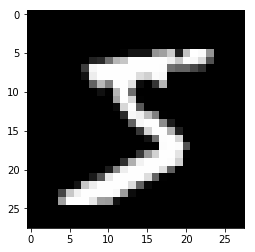

In [3]:
img = mnist.train.images[0]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:
img

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
tf.reset_default_graph()

# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 28*28], 'input')
targets_ =  tf.placeholder(tf.float32, [None, 28*28], 'target')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu, name='encoded')

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 28*28, activation=None, name='logits')

# Sigmoid output from logits
decoded = tf.sigmoid(logits, name='decoded')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits, name='loss')

# Mean of the loss
cost = tf.reduce_mean(loss, name='cost')

# Adam optimizer
opt = tf.train.AdamOptimizer(0.0005).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6943
Epoch: 1/20... Training loss: 0.6927
Epoch: 1/20... Training loss: 0.6912
Epoch: 1/20... Training loss: 0.6898
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6864
Epoch: 1/20... Training loss: 0.6845
Epoch: 1/20... Training loss: 0.6825
Epoch: 1/20... Training loss: 0.6802
Epoch: 1/20... Training loss: 0.6777
Epoch: 1/20... Training loss: 0.6747
Epoch: 1/20... Training loss: 0.6712
Epoch: 1/20... Training loss: 0.6675
Epoch: 1/20... Training loss: 0.6644
Epoch: 1/20... Training loss: 0.6587
Epoch: 1/20... Training loss: 0.6543
Epoch: 1/20... Training loss: 0.6474
Epoch: 1/20... Training loss: 0.6439
Epoch: 1/20... Training loss: 0.6362
Epoch: 1/20... Training loss: 0.6291
Epoch: 1/20... Training loss: 0.6222
Epoch: 1/20... Training loss: 0.6130
Epoch: 1/20... Training loss: 0.6060
Epoch: 1/20... Training loss: 0.5938
Epoch: 1/20... Training loss: 0.5891
Epoch: 1/20... Training loss: 0.5778
Epoch: 1/20... Training loss: 0.5652
E

Epoch: 1/20... Training loss: 0.2181
Epoch: 1/20... Training loss: 0.2230
Epoch: 1/20... Training loss: 0.2197
Epoch: 2/20... Training loss: 0.2166
Epoch: 2/20... Training loss: 0.2132
Epoch: 2/20... Training loss: 0.2170
Epoch: 2/20... Training loss: 0.2110
Epoch: 2/20... Training loss: 0.2129
Epoch: 2/20... Training loss: 0.2144
Epoch: 2/20... Training loss: 0.2183
Epoch: 2/20... Training loss: 0.2146
Epoch: 2/20... Training loss: 0.2178
Epoch: 2/20... Training loss: 0.2122
Epoch: 2/20... Training loss: 0.2156
Epoch: 2/20... Training loss: 0.2181
Epoch: 2/20... Training loss: 0.2191
Epoch: 2/20... Training loss: 0.2104
Epoch: 2/20... Training loss: 0.2150
Epoch: 2/20... Training loss: 0.2118
Epoch: 2/20... Training loss: 0.2095
Epoch: 2/20... Training loss: 0.2169
Epoch: 2/20... Training loss: 0.2176
Epoch: 2/20... Training loss: 0.2082
Epoch: 2/20... Training loss: 0.2165
Epoch: 2/20... Training loss: 0.2129
Epoch: 2/20... Training loss: 0.2137
Epoch: 2/20... Training loss: 0.2138
E

Epoch: 2/20... Training loss: 0.1789
Epoch: 2/20... Training loss: 0.1798
Epoch: 2/20... Training loss: 0.1816
Epoch: 2/20... Training loss: 0.1782
Epoch: 2/20... Training loss: 0.1805
Epoch: 2/20... Training loss: 0.1814
Epoch: 2/20... Training loss: 0.1775
Epoch: 2/20... Training loss: 0.1865
Epoch: 2/20... Training loss: 0.1837
Epoch: 2/20... Training loss: 0.1785
Epoch: 2/20... Training loss: 0.1788
Epoch: 2/20... Training loss: 0.1851
Epoch: 2/20... Training loss: 0.1788
Epoch: 2/20... Training loss: 0.1779
Epoch: 2/20... Training loss: 0.1783
Epoch: 2/20... Training loss: 0.1738
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1811
Epoch: 2/20... Training loss: 0.1803
Epoch: 2/20... Training loss: 0.1805
Epoch: 2/20... Training loss: 0.1831
Epoch: 2/20... Training loss: 0.1752
Epoch: 2/20... Training loss: 0.1806
Epoch: 2/20... Training loss: 0.1780
Epoch: 2/20... Training loss: 0.1841
Epoch: 2/20... Training loss: 0.1874
Epoch: 2/20... Training loss: 0.1798
E

Epoch: 3/20... Training loss: 0.1597
Epoch: 3/20... Training loss: 0.1666
Epoch: 3/20... Training loss: 0.1580
Epoch: 3/20... Training loss: 0.1589
Epoch: 3/20... Training loss: 0.1616
Epoch: 3/20... Training loss: 0.1578
Epoch: 3/20... Training loss: 0.1580
Epoch: 3/20... Training loss: 0.1592
Epoch: 3/20... Training loss: 0.1634
Epoch: 3/20... Training loss: 0.1575
Epoch: 3/20... Training loss: 0.1597
Epoch: 3/20... Training loss: 0.1607
Epoch: 3/20... Training loss: 0.1641
Epoch: 3/20... Training loss: 0.1643
Epoch: 3/20... Training loss: 0.1566
Epoch: 3/20... Training loss: 0.1549
Epoch: 3/20... Training loss: 0.1598
Epoch: 3/20... Training loss: 0.1562
Epoch: 3/20... Training loss: 0.1617
Epoch: 3/20... Training loss: 0.1646
Epoch: 3/20... Training loss: 0.1643
Epoch: 3/20... Training loss: 0.1630
Epoch: 3/20... Training loss: 0.1610
Epoch: 3/20... Training loss: 0.1595
Epoch: 3/20... Training loss: 0.1622
Epoch: 3/20... Training loss: 0.1604
Epoch: 3/20... Training loss: 0.1615
E

Epoch: 4/20... Training loss: 0.1421
Epoch: 4/20... Training loss: 0.1553
Epoch: 4/20... Training loss: 0.1390
Epoch: 4/20... Training loss: 0.1464
Epoch: 4/20... Training loss: 0.1431
Epoch: 4/20... Training loss: 0.1520
Epoch: 4/20... Training loss: 0.1399
Epoch: 4/20... Training loss: 0.1487
Epoch: 4/20... Training loss: 0.1431
Epoch: 4/20... Training loss: 0.1393
Epoch: 4/20... Training loss: 0.1488
Epoch: 4/20... Training loss: 0.1455
Epoch: 4/20... Training loss: 0.1442
Epoch: 4/20... Training loss: 0.1443
Epoch: 4/20... Training loss: 0.1433
Epoch: 4/20... Training loss: 0.1449
Epoch: 4/20... Training loss: 0.1461
Epoch: 4/20... Training loss: 0.1461
Epoch: 4/20... Training loss: 0.1430
Epoch: 4/20... Training loss: 0.1447
Epoch: 4/20... Training loss: 0.1458
Epoch: 4/20... Training loss: 0.1376
Epoch: 4/20... Training loss: 0.1496
Epoch: 4/20... Training loss: 0.1447
Epoch: 4/20... Training loss: 0.1397
Epoch: 4/20... Training loss: 0.1472
Epoch: 4/20... Training loss: 0.1405
E

Epoch: 5/20... Training loss: 0.1328
Epoch: 5/20... Training loss: 0.1395
Epoch: 5/20... Training loss: 0.1340
Epoch: 5/20... Training loss: 0.1342
Epoch: 5/20... Training loss: 0.1345
Epoch: 5/20... Training loss: 0.1307
Epoch: 5/20... Training loss: 0.1336
Epoch: 5/20... Training loss: 0.1346
Epoch: 5/20... Training loss: 0.1359
Epoch: 5/20... Training loss: 0.1345
Epoch: 5/20... Training loss: 0.1354
Epoch: 5/20... Training loss: 0.1375
Epoch: 5/20... Training loss: 0.1350
Epoch: 5/20... Training loss: 0.1362
Epoch: 5/20... Training loss: 0.1353
Epoch: 5/20... Training loss: 0.1362
Epoch: 5/20... Training loss: 0.1315
Epoch: 5/20... Training loss: 0.1377
Epoch: 5/20... Training loss: 0.1352
Epoch: 5/20... Training loss: 0.1338
Epoch: 5/20... Training loss: 0.1366
Epoch: 5/20... Training loss: 0.1336
Epoch: 5/20... Training loss: 0.1333
Epoch: 5/20... Training loss: 0.1318
Epoch: 5/20... Training loss: 0.1331
Epoch: 5/20... Training loss: 0.1327
Epoch: 5/20... Training loss: 0.1349
E

Epoch: 6/20... Training loss: 0.1250
Epoch: 6/20... Training loss: 0.1259
Epoch: 6/20... Training loss: 0.1231
Epoch: 6/20... Training loss: 0.1272
Epoch: 6/20... Training loss: 0.1234
Epoch: 6/20... Training loss: 0.1215
Epoch: 6/20... Training loss: 0.1246
Epoch: 6/20... Training loss: 0.1280
Epoch: 6/20... Training loss: 0.1248
Epoch: 6/20... Training loss: 0.1258
Epoch: 6/20... Training loss: 0.1230
Epoch: 6/20... Training loss: 0.1327
Epoch: 6/20... Training loss: 0.1237
Epoch: 6/20... Training loss: 0.1313
Epoch: 6/20... Training loss: 0.1278
Epoch: 6/20... Training loss: 0.1262
Epoch: 6/20... Training loss: 0.1262
Epoch: 6/20... Training loss: 0.1245
Epoch: 6/20... Training loss: 0.1222
Epoch: 6/20... Training loss: 0.1250
Epoch: 6/20... Training loss: 0.1271
Epoch: 6/20... Training loss: 0.1271
Epoch: 6/20... Training loss: 0.1226
Epoch: 6/20... Training loss: 0.1257
Epoch: 6/20... Training loss: 0.1219
Epoch: 6/20... Training loss: 0.1217
Epoch: 6/20... Training loss: 0.1245
E

Epoch: 7/20... Training loss: 0.1174
Epoch: 7/20... Training loss: 0.1145
Epoch: 7/20... Training loss: 0.1145
Epoch: 7/20... Training loss: 0.1247
Epoch: 7/20... Training loss: 0.1220
Epoch: 7/20... Training loss: 0.1192
Epoch: 7/20... Training loss: 0.1203
Epoch: 7/20... Training loss: 0.1230
Epoch: 7/20... Training loss: 0.1133
Epoch: 7/20... Training loss: 0.1240
Epoch: 7/20... Training loss: 0.1191
Epoch: 7/20... Training loss: 0.1208
Epoch: 7/20... Training loss: 0.1168
Epoch: 7/20... Training loss: 0.1200
Epoch: 7/20... Training loss: 0.1153
Epoch: 7/20... Training loss: 0.1175
Epoch: 7/20... Training loss: 0.1198
Epoch: 7/20... Training loss: 0.1242
Epoch: 7/20... Training loss: 0.1191
Epoch: 7/20... Training loss: 0.1135
Epoch: 7/20... Training loss: 0.1186
Epoch: 7/20... Training loss: 0.1184
Epoch: 7/20... Training loss: 0.1173
Epoch: 7/20... Training loss: 0.1183
Epoch: 7/20... Training loss: 0.1215
Epoch: 7/20... Training loss: 0.1154
Epoch: 7/20... Training loss: 0.1133
E

Epoch: 8/20... Training loss: 0.1135
Epoch: 8/20... Training loss: 0.1175
Epoch: 8/20... Training loss: 0.1152
Epoch: 8/20... Training loss: 0.1087
Epoch: 8/20... Training loss: 0.1122
Epoch: 8/20... Training loss: 0.1119
Epoch: 8/20... Training loss: 0.1121
Epoch: 8/20... Training loss: 0.1125
Epoch: 8/20... Training loss: 0.1108
Epoch: 8/20... Training loss: 0.1134
Epoch: 8/20... Training loss: 0.1164
Epoch: 8/20... Training loss: 0.1099
Epoch: 8/20... Training loss: 0.1145
Epoch: 8/20... Training loss: 0.1172
Epoch: 8/20... Training loss: 0.1190
Epoch: 8/20... Training loss: 0.1132
Epoch: 8/20... Training loss: 0.1169
Epoch: 8/20... Training loss: 0.1109
Epoch: 8/20... Training loss: 0.1141
Epoch: 8/20... Training loss: 0.1116
Epoch: 8/20... Training loss: 0.1117
Epoch: 8/20... Training loss: 0.1201
Epoch: 8/20... Training loss: 0.1156
Epoch: 8/20... Training loss: 0.1149
Epoch: 8/20... Training loss: 0.1142
Epoch: 8/20... Training loss: 0.1150
Epoch: 8/20... Training loss: 0.1171
E

Epoch: 9/20... Training loss: 0.1106
Epoch: 9/20... Training loss: 0.1108
Epoch: 9/20... Training loss: 0.1100
Epoch: 9/20... Training loss: 0.1134
Epoch: 9/20... Training loss: 0.1094
Epoch: 9/20... Training loss: 0.1115
Epoch: 9/20... Training loss: 0.1053
Epoch: 9/20... Training loss: 0.1066
Epoch: 9/20... Training loss: 0.1143
Epoch: 9/20... Training loss: 0.1067
Epoch: 9/20... Training loss: 0.1102
Epoch: 9/20... Training loss: 0.1115
Epoch: 9/20... Training loss: 0.1098
Epoch: 9/20... Training loss: 0.1094
Epoch: 9/20... Training loss: 0.1059
Epoch: 9/20... Training loss: 0.1071
Epoch: 9/20... Training loss: 0.1073
Epoch: 9/20... Training loss: 0.1086
Epoch: 9/20... Training loss: 0.1128
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1078
Epoch: 9/20... Training loss: 0.1086
Epoch: 9/20... Training loss: 0.1087
Epoch: 9/20... Training loss: 0.1119
Epoch: 9/20... Training loss: 0.1117
Epoch: 9/20... Training loss: 0.1072
Epoch: 9/20... Training loss: 0.1099
E

Epoch: 10/20... Training loss: 0.1033
Epoch: 10/20... Training loss: 0.1077
Epoch: 10/20... Training loss: 0.1029
Epoch: 10/20... Training loss: 0.1043
Epoch: 10/20... Training loss: 0.1075
Epoch: 10/20... Training loss: 0.1053
Epoch: 10/20... Training loss: 0.1095
Epoch: 10/20... Training loss: 0.1108
Epoch: 10/20... Training loss: 0.1062
Epoch: 10/20... Training loss: 0.1081
Epoch: 10/20... Training loss: 0.1049
Epoch: 10/20... Training loss: 0.1078
Epoch: 10/20... Training loss: 0.1094
Epoch: 10/20... Training loss: 0.1087
Epoch: 10/20... Training loss: 0.1061
Epoch: 10/20... Training loss: 0.1095
Epoch: 10/20... Training loss: 0.1039
Epoch: 10/20... Training loss: 0.1047
Epoch: 10/20... Training loss: 0.1060
Epoch: 10/20... Training loss: 0.1043
Epoch: 10/20... Training loss: 0.1037
Epoch: 10/20... Training loss: 0.1074
Epoch: 10/20... Training loss: 0.1074
Epoch: 10/20... Training loss: 0.1066
Epoch: 10/20... Training loss: 0.1068
Epoch: 10/20... Training loss: 0.1060
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1047
Epoch: 11/20... Training loss: 0.1028
Epoch: 11/20... Training loss: 0.1033
Epoch: 11/20... Training loss: 0.1041
Epoch: 11/20... Training loss: 0.1043
Epoch: 11/20... Training loss: 0.1044
Epoch: 11/20... Training loss: 0.1022
Epoch: 11/20... Training loss: 0.1046
Epoch: 11/20... Training loss: 0.1039
Epoch: 11/20... Training loss: 0.1023
Epoch: 11/20... Training loss: 0.1043
Epoch: 11/20... Training loss: 0.1072
Epoch: 11/20... Training loss: 0.1024
Epoch: 11/20... Training loss: 0.1053
Epoch: 11/20... Training loss: 0.1061
Epoch: 11/20... Training loss: 0.1040
Epoch: 11/20... Training loss: 0.1038
Epoch: 11/20... Training loss: 0.1035
Epoch: 11/20... Training loss: 0.1062
Epoch: 11/20... Training loss: 0.1056
Epoch: 11/20... Training loss: 0.1032
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.1022
Epoch: 11/20... Training loss: 0.1020
Epoch: 11/20... Training loss: 0.1023
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.1039
Epoch: 12/20... Training loss: 0.1032
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.1034
Epoch: 12/20... Training loss: 0.1054
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.1029
Epoch: 12/20... Training loss: 0.1021
Epoch: 12/20... Training loss: 0.1002
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.1007
Epoch: 12/20... Training loss: 0.1016
Epoch: 12/20... Training loss: 0.1007
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.1017
Epoch: 12/20... Training loss: 0.1047
Epoch: 12/20... Training loss: 0.0999
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.1008
Epoch: 12/20... Training loss: 0.1015
Epoch: 12/20... Training loss: 0.1027
Epoch: 12/20... Training loss: 0.1021
Epoch: 12/20... Training loss: 0.1026
Epoch: 12/20... Training loss: 0.1022
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1001
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0998
Epoch: 13/20... Training loss: 0.1027
Epoch: 13/20... Training loss: 0.1005
Epoch: 13/20... Training loss: 0.1000
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.1000
Epoch: 13/20... Training loss: 0.1009
Epoch: 13/20... Training loss: 0.1022
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.1001
Epoch: 13/20... Training loss: 0.1002
Epoch: 13/20... Training loss: 0.1030
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20... Training loss: 0.1005
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.1002
Epoch: 14/20... Training loss: 0.1013
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.0997
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0991
Epoch: 14/20... Training loss: 0.0995
Epoch: 14/20... Training loss: 0.1003
Epoch: 14/20... Training loss: 0.0992
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.1004
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.1014
Epoch: 15/20... Training loss: 0.0990
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0989
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0996
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.1005
Epoch: 16/20... Training loss: 0.0991
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.1011
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0989
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0990
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0993
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

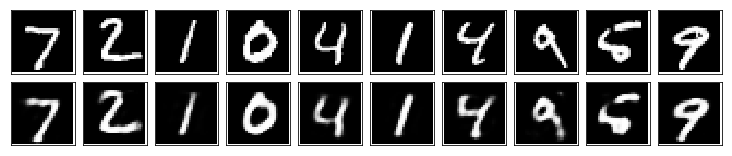

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(10,2))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.